In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### 1. Loading data

In [2]:
datasetName = '../data/MiningProcess_Flotation_Plant_Database.csv'

df = pd.read_csv(datasetName,
                 decimal=",", parse_dates=["date"], 
                 infer_datetime_format=True).drop_duplicates()

summary = df.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
% Iron Feed,736282.0,56.298307,5.160365,42.740000,52.670000,56.08000,59.72000,65.78000
% Silica Feed,736282.0,14.648984,6.810741,1.310000,8.940000,13.85000,19.60000,33.40000
Starch Flow,736282.0,2869.636615,1216.017896,0.002026,2075.070000,3020.23000,3728.93000,6300.23000
Amina Flow,736282.0,488.165523,91.254428,241.669000,431.835848,504.35250,553.33575,739.53800
Ore Pulp Flow,736282.0,397.570736,9.705444,376.249000,394.248000,399.23800,402.96700,418.64100
Ore Pulp pH,736282.0,9.767315,0.387176,8.753340,9.527050,9.79746,10.03780,10.80810
Ore Pulp Density,736282.0,1.680424,0.069206,1.519820,1.647390,1.69758,1.72838,1.85325
Flotation Column 01 Air Flow,736282.0,280.119813,29.633831,175.510000,250.278000,299.34100,300.14700,373.87100
Flotation Column 02 Air Flow,736282.0,277.121249,30.157126,175.156000,250.448000,296.20200,300.68600,375.99200
Flotation Column 03 Air Flow,736282.0,281.052538,28.571077,176.469000,250.847000,298.69000,300.38500,364.34600


In [3]:
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


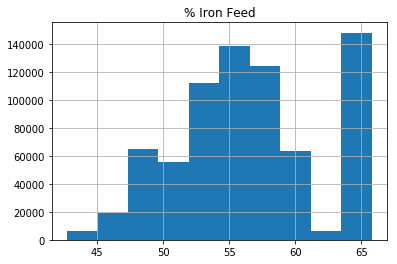

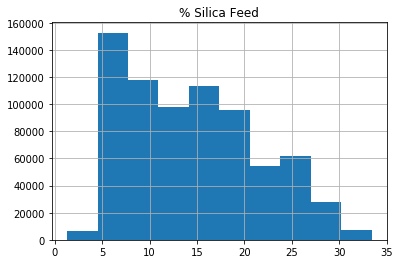

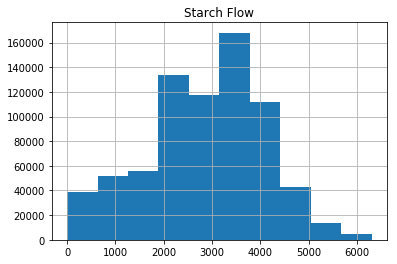

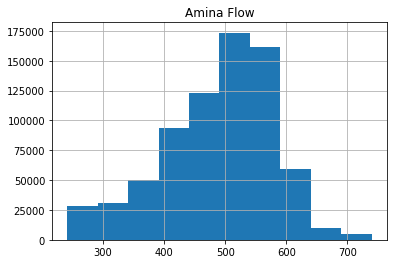

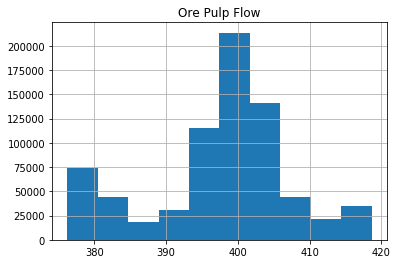

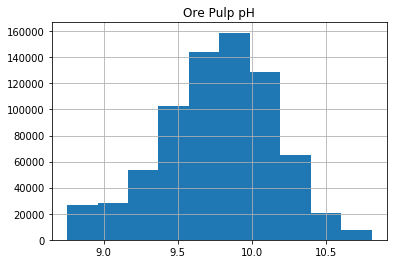

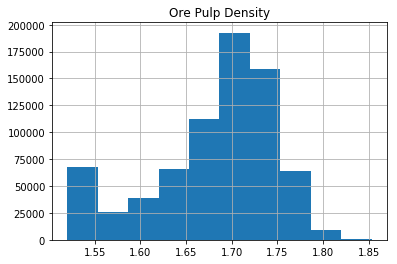

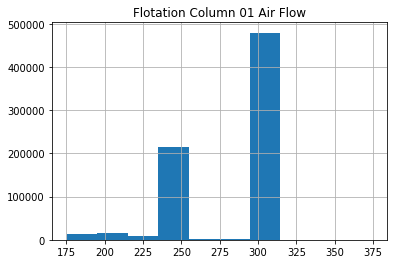

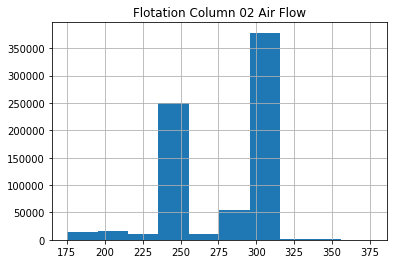

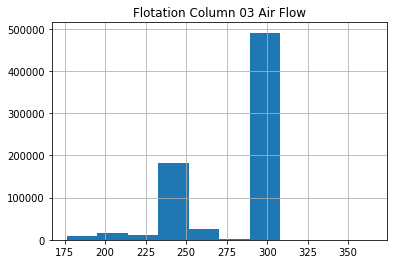

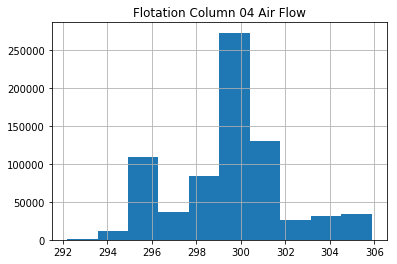

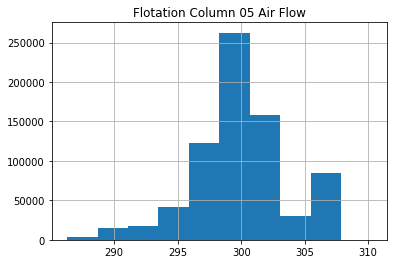

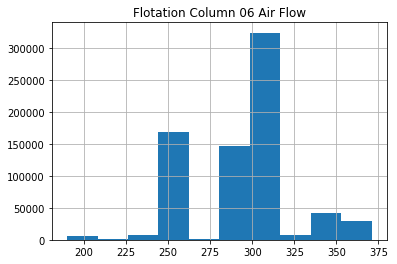

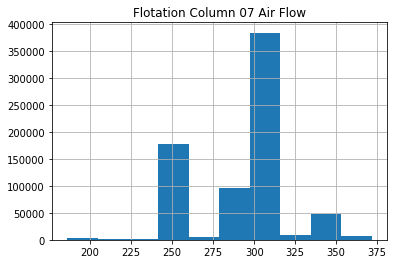

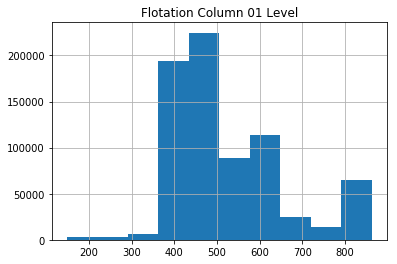

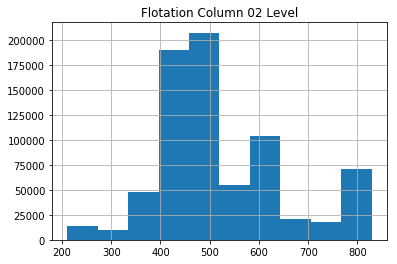

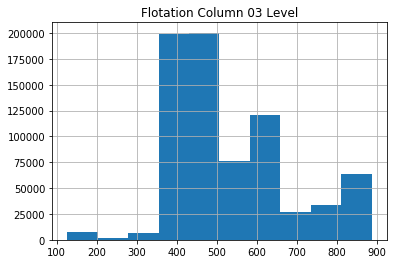

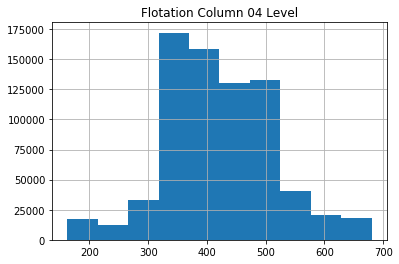

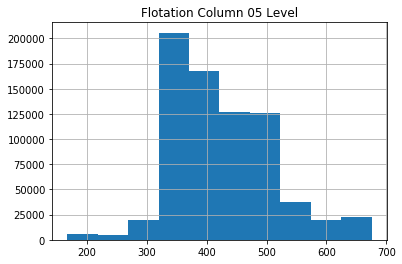

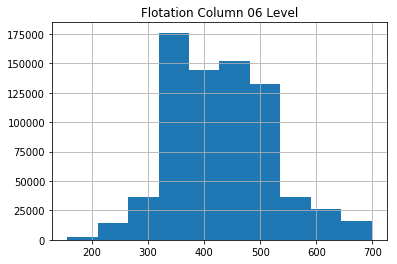

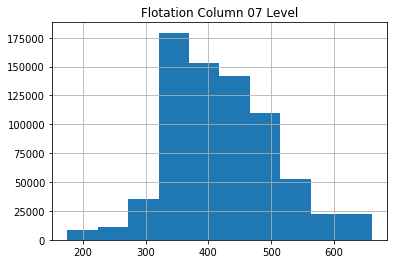

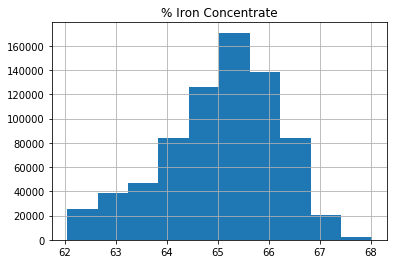

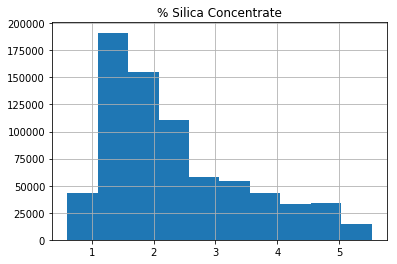

In [4]:
for col in df.columns[1:]:
    df.hist(column = col)

### 2. Extract date information

In [5]:
df['day_of_month'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df['hour'] = df['date'].dt.hour

df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,day_of_month,day_of_week,hour
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,424.954,443.558,502.255,446.370,523.344,66.91,1.31,10,4,1
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,432.939,448.086,496.363,445.922,498.075,66.91,1.31,10,4,1
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,434.610,449.688,484.411,447.826,458.567,66.91,1.31,10,4,1
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,442.865,446.210,471.411,437.690,427.669,66.91,1.31,10,4,1
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,450.523,453.670,462.598,443.682,425.679,66.91,1.31,10,4,1


In [6]:
df = df[['date','day_of_month','day_of_week','hour','% Iron Feed','% Silica Feed','Starch Flow','Amina Flow','Ore Pulp Flow','Ore Pulp pH','Ore Pulp Density','Flotation Column 01 Air Flow',
         'Flotation Column 02 Air Flow','Flotation Column 03 Air Flow','Flotation Column 04 Air Flow','Flotation Column 05 Air Flow','Flotation Column 06 Air Flow',
         'Flotation Column 07 Air Flow','Flotation Column 01 Level','Flotation Column 02 Level','Flotation Column 03 Level','Flotation Column 04 Level',
         'Flotation Column 05 Level','Flotation Column 06 Level','Flotation Column 07 Level','% Iron Concentrate','% Silica Concentrate']]

df.head()

,date,day_of_month,day_of_week,hour,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,10,4,1,55.2,16.98,3019.53,557.434,395.713,10.0664,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,10,4,1,55.2,16.98,3024.41,563.965,397.383,10.0672,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,10,4,1,55.2,16.98,3043.46,568.054,399.668,10.0680,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,10,4,1,55.2,16.98,3047.36,568.665,397.939,10.0689,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,10,4,1,55.2,16.98,3033.69,558.167,400.254,10.0697,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


### 3. Grouping

The dataset contains multiple sensor measures in a flotation plant per hour. Nevertheless, target attribute ('% Silica Concetrate') is a computed mean over 1h-windows (which computation is costly and takes up to 1 hour after the real extraction). To be able to perform any kind of prediction based on the plant sensors data we need to adjust the time frame between the measurements and the target data. We will group rows by date and take the mean of the sensors data as its representative value for that time frame.

In [7]:
df = df.groupby(['date']).mean()
df.head()

,day_of_month,day_of_week,hour,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,10,4,1,55.2,16.98,3162.625026,578.786678,398.753368,10.113487,1.729558,...,250.208184,450.383776,446.891845,450.474523,449.912259,455.792161,464.383310,450.532747,66.91,1.31
2017-03-10 02:00:00,10,4,2,55.2,16.98,3133.256389,537.219661,399.871822,10.129742,1.667784,...,249.897572,449.373361,450.249356,450.081222,450.328806,448.722983,455.501528,451.387700,67.06,1.11
2017-03-10 03:00:00,10,4,3,55.2,16.98,3479.482944,591.906744,398.763806,10.048403,1.732711,...,250.484183,449.972878,450.868711,450.901822,451.145822,451.134189,459.981311,450.296722,66.97,1.27
2017-03-10 04:00:00,10,4,4,55.2,16.98,3228.036436,593.170106,399.866983,9.918614,1.731056,...,250.157622,487.940706,491.462111,487.387206,494.528183,495.664011,502.763850,494.939889,66.75,1.36
2017-03-10 05:00:00,10,4,5,55.2,16.98,3327.280739,619.710806,399.615089,9.746029,1.765879,...,250.078639,549.031539,549.983156,549.459572,549.975483,549.512533,560.696300,550.271772,66.63,1.34


In [8]:
summary = df.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
day_of_month,4097.0,15.330730,8.932539,1.000000,8.000000,15.000000,23.000000,31.000000
day_of_week,4097.0,3.014401,1.992304,0.000000,1.000000,3.000000,5.000000,6.000000
hour,4097.0,11.507200,6.925349,0.000000,5.000000,12.000000,18.000000,23.000000
% Iron Feed,4097.0,56.294730,5.158347,42.740000,52.670000,56.080000,59.720000,65.780000
% Silica Feed,4097.0,14.651733,6.808236,1.310000,8.940000,13.850000,19.600000,33.400000
Starch Flow,4097.0,2868.915033,950.895934,54.595483,2168.968993,2908.578878,3528.727412,6270.158798
Amina Flow,4097.0,488.160636,83.694790,242.927477,436.037967,502.454283,549.522256,736.982378
Ore Pulp Flow,4097.0,397.577005,8.370186,376.837604,398.848778,399.841806,400.584861,418.070232
Ore Pulp pH,4097.0,9.767704,0.378065,8.753389,9.540878,9.795850,10.030779,10.807370
Ore Pulp Density,4097.0,1.680399,0.063759,1.519926,1.651352,1.695735,1.721790,1.832430


### 3. Variable correlation

The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

In [9]:
def plot_corr(df, size=20):
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(size, size))
    with sns.axes_style("white"):
        ax = sns.heatmap(corr, mask=mask, vmax=.3, cmap='coolwarm', square=True)

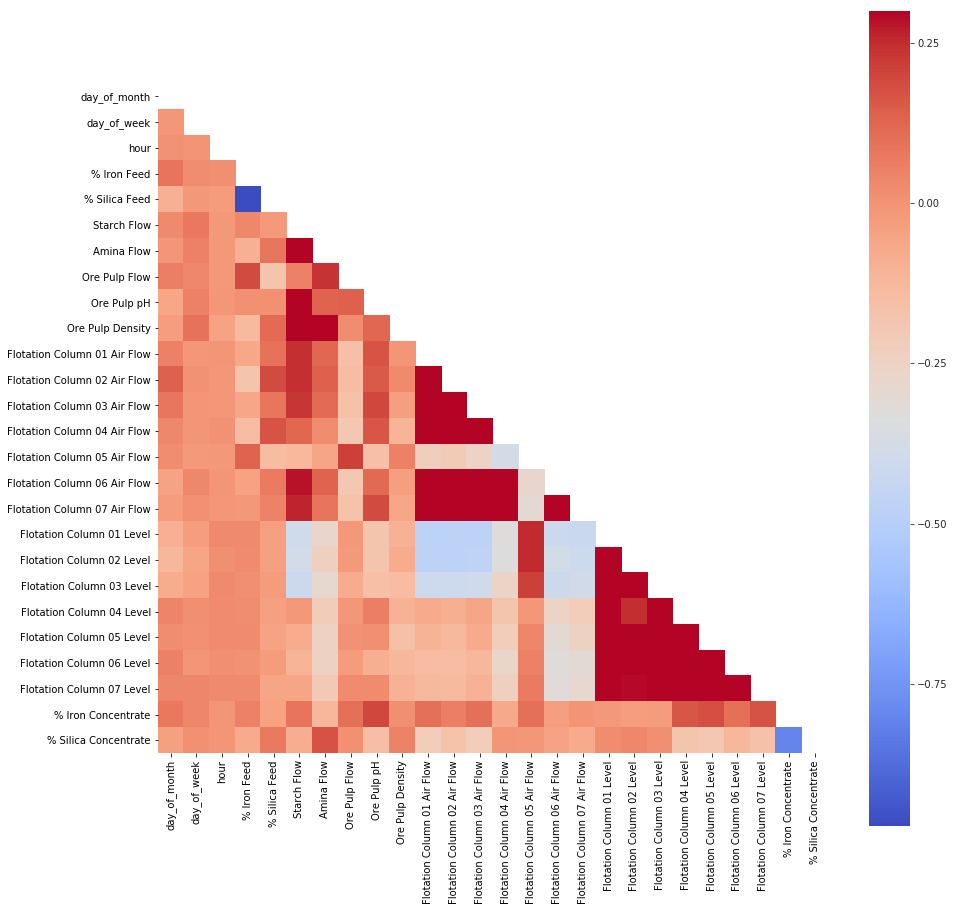

In [10]:
plot_corr(df, 15)

Most weighted correlations are found on the pairs ('% Silica Feed', '% Iron Feed') and ('% Silica Concentrate', '% Iron Concentrate') with up to a pearson coefficient of -0.8. '% Iron Concentrate' would be a great predictor for '% Silica Concentrate' if it wouldn't take up to the same time to get the computed lab value as for the target variable, so we need to discard the column. For the first pair, we will keep '% Iron Feed'. We won't drop any other columns as correlation is close to 0.3 in the worst cases (which is not a really concerning value).

In [11]:
df.drop(columns=['% Silica Feed', 
                 '% Iron Concentrate'], inplace=True)

summary = df.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
day_of_month,4097.0,15.330730,8.932539,1.000000,8.000000,15.000000,23.000000,31.000000
day_of_week,4097.0,3.014401,1.992304,0.000000,1.000000,3.000000,5.000000,6.000000
hour,4097.0,11.507200,6.925349,0.000000,5.000000,12.000000,18.000000,23.000000
% Iron Feed,4097.0,56.294730,5.158347,42.740000,52.670000,56.080000,59.720000,65.780000
Starch Flow,4097.0,2868.915033,950.895934,54.595483,2168.968993,2908.578878,3528.727412,6270.158798
Amina Flow,4097.0,488.160636,83.694790,242.927477,436.037967,502.454283,549.522256,736.982378
Ore Pulp Flow,4097.0,397.577005,8.370186,376.837604,398.848778,399.841806,400.584861,418.070232
Ore Pulp pH,4097.0,9.767704,0.378065,8.753389,9.540878,9.795850,10.030779,10.807370
Ore Pulp Density,4097.0,1.680399,0.063759,1.519926,1.651352,1.695735,1.721790,1.832430
Flotation Column 01 Air Flow,4097.0,280.151387,29.409908,175.885579,250.089767,299.837839,299.951350,312.295415


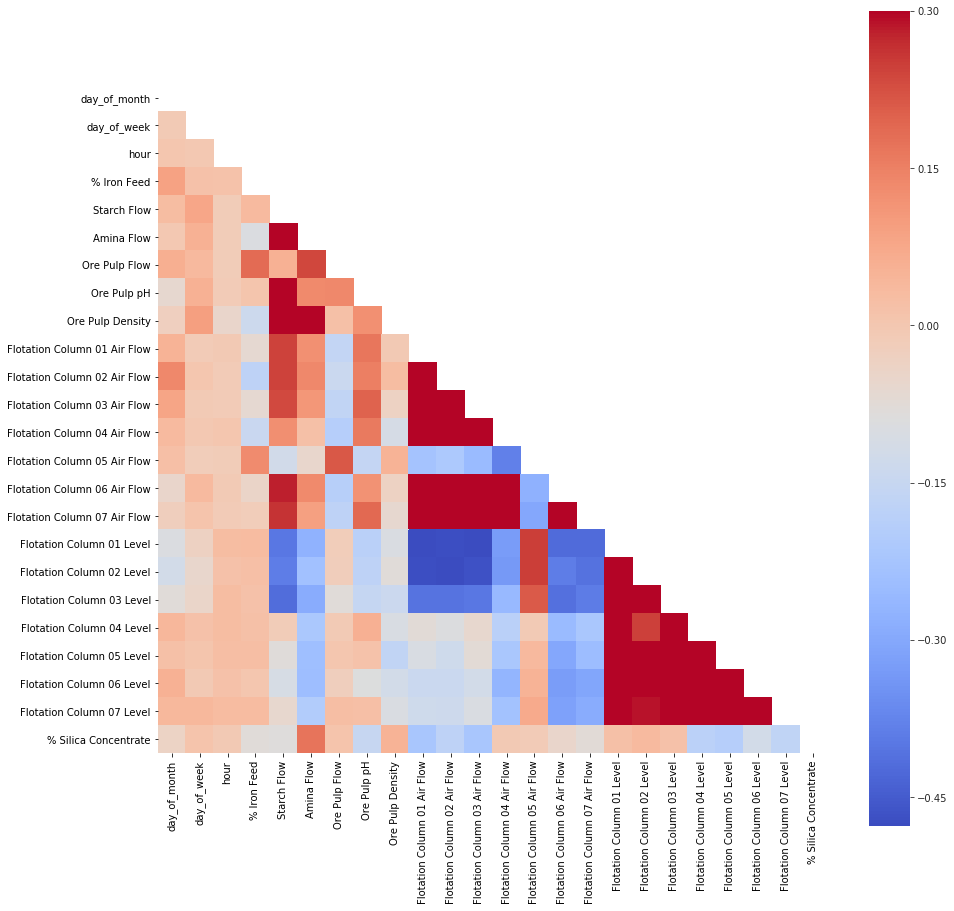

In [12]:
plot_corr(df, 15)

### 4. Add extra information

As we said, '% Silica Concentrate' is a lab measure that takes up to 1 hour after the sample is taken. We will enrich our dataset with information of past measures - 2 hours for safety, as 1 should be enough time (there are no gaps on the training set and on the real set, last valid value should be used).

In [13]:
df['sc_lag2'] = df['% Silica Concentrate'].shift(2)
df.head()

,day_of_month,day_of_week,hour,% Iron Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate,sc_lag2
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,10,4,1,55.2,3162.625026,578.786678,398.753368,10.113487,1.729558,251.166672,...,250.208184,450.383776,446.891845,450.474523,449.912259,455.792161,464.383310,450.532747,1.31,NaN
2017-03-10 02:00:00,10,4,2,55.2,3133.256389,537.219661,399.871822,10.129742,1.667784,249.880589,...,249.897572,449.373361,450.249356,450.081222,450.328806,448.722983,455.501528,451.387700,1.11,NaN
2017-03-10 03:00:00,10,4,3,55.2,3479.482944,591.906744,398.763806,10.048403,1.732711,250.161328,...,250.484183,449.972878,450.868711,450.901822,451.145822,451.134189,459.981311,450.296722,1.27,1.31
2017-03-10 04:00:00,10,4,4,55.2,3228.036436,593.170106,399.866983,9.918614,1.731056,250.208772,...,250.157622,487.940706,491.462111,487.387206,494.528183,495.664011,502.763850,494.939889,1.36,1.11
2017-03-10 05:00:00,10,4,5,55.2,3327.280739,619.710806,399.615089,9.746029,1.765879,249.917800,...,250.078639,549.031539,549.983156,549.459572,549.975483,549.512533,560.696300,550.271772,1.34,1.27


In [14]:
df = df[[
    'day_of_month',
    'day_of_week',
    'hour',
    '% Iron Feed',
    'Starch Flow',
    'Amina Flow',
    'Ore Pulp Flow',
    'Ore Pulp pH',
    'Ore Pulp Density',
    'Flotation Column 01 Air Flow',
    'Flotation Column 02 Air Flow',
    'Flotation Column 03 Air Flow',
    'Flotation Column 04 Air Flow',
    'Flotation Column 05 Air Flow',
    'Flotation Column 06 Air Flow',
    'Flotation Column 07 Air Flow',
    'Flotation Column 01 Level',
    'Flotation Column 02 Level',
    'Flotation Column 03 Level',
    'Flotation Column 04 Level',
    'Flotation Column 05 Level',
    'Flotation Column 06 Level',
    'Flotation Column 07 Level',
    'sc_lag2',
    '% Silica Concentrate'
]]

df = df.fillna(df.mean())

df.head()

,day_of_month,day_of_week,hour,% Iron Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,sc_lag2,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,10,4,1,55.2,3162.625026,578.786678,398.753368,10.113487,1.729558,251.166672,...,250.208184,450.383776,446.891845,450.474523,449.912259,455.792161,464.383310,450.532747,2.326994,1.31
2017-03-10 02:00:00,10,4,2,55.2,3133.256389,537.219661,399.871822,10.129742,1.667784,249.880589,...,249.897572,449.373361,450.249356,450.081222,450.328806,448.722983,455.501528,451.387700,2.326994,1.11
2017-03-10 03:00:00,10,4,3,55.2,3479.482944,591.906744,398.763806,10.048403,1.732711,250.161328,...,250.484183,449.972878,450.868711,450.901822,451.145822,451.134189,459.981311,450.296722,1.310000,1.27
2017-03-10 04:00:00,10,4,4,55.2,3228.036436,593.170106,399.866983,9.918614,1.731056,250.208772,...,250.157622,487.940706,491.462111,487.387206,494.528183,495.664011,502.763850,494.939889,1.110000,1.36
2017-03-10 05:00:00,10,4,5,55.2,3327.280739,619.710806,399.615089,9.746029,1.765879,249.917800,...,250.078639,549.031539,549.983156,549.459572,549.975483,549.512533,560.696300,550.271772,1.270000,1.34


In [15]:
summary = df.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
day_of_month,4097.0,15.330730,8.932539,1.000000,8.000000,15.000000,23.000000,31.000000
day_of_week,4097.0,3.014401,1.992304,0.000000,1.000000,3.000000,5.000000,6.000000
hour,4097.0,11.507200,6.925349,0.000000,5.000000,12.000000,18.000000,23.000000
% Iron Feed,4097.0,56.294730,5.158347,42.740000,52.670000,56.080000,59.720000,65.780000
Starch Flow,4097.0,2868.915033,950.895934,54.595483,2168.968993,2908.578878,3528.727412,6270.158798
Amina Flow,4097.0,488.160636,83.694790,242.927477,436.037967,502.454283,549.522256,736.982378
Ore Pulp Flow,4097.0,397.577005,8.370186,376.837604,398.848778,399.841806,400.584861,418.070232
Ore Pulp pH,4097.0,9.767704,0.378065,8.753389,9.540878,9.795850,10.030779,10.807370
Ore Pulp Density,4097.0,1.680399,0.063759,1.519926,1.651352,1.695735,1.721790,1.832430
Flotation Column 01 Air Flow,4097.0,280.151387,29.409908,175.885579,250.089767,299.837839,299.951350,312.295415


### 5. Export prepared data for further analysis

In [16]:
# For exploration
df.to_csv('prepared_data.csv')

In [17]:
# For training
df = df.reset_index()
df.drop(columns=['date'], inplace=True)
df.to_csv('train_data.csv', index=False)